In [1]:
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

Link dataset: https://drive.google.com/drive/folders/1-uudTCIBWxnvdGwataxPGxsrqmiMQ5Tj?usp=share_link

In [2]:
# connect to Gdrive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd gdrive/MyDrive/Dataset\ Deep \Learning/Tugas-VGG16/

/content/gdrive/MyDrive/Dataset Deep Learning/Tugas-VGG16


In [4]:
%ls

Data-Testing/  Data-Training/


In [5]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [6]:
#opt = Adam(learning_rate=0.001)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [8]:
# generators
# Initialize Generator
gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    validation_split=0.2
)

data_path = "Data-Training/"

train_ds=gen.flow_from_directory(
    data_path,
    class_mode='categorical',
    shuffle=True,
    batch_size=32,
    target_size=(244,244),
    subset="training"
)

validation_ds=gen.flow_from_directory(
    data_path,
    class_mode='categorical',
    shuffle=True,
    batch_size=32,
    target_size=(244,244),
    subset="validation"
)

Found 720 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


In [9]:
history = model.fit(
    train_ds,
    steps_per_epoch=train_ds.samples // train_ds.batch_size,
    validation_data=validation_ds,
    validation_steps=validation_ds.samples // validation_ds.batch_size,
    epochs=10,
    verbose=1)

Epoch 1/10
22/22 [==============================] - 81s 3s/step - loss: 636.3495 - accuracy: 0.3532 - val_loss: 1.1001 - val_accuracy: 0.3500
Epoch 2/10
22/22 [==============================] - 21s 935ms/step - loss: 1.0942 - accuracy: 0.3241 - val_loss: 4.9695 - val_accuracy: 0.3125
Epoch 3/10
22/22 [==============================] - 21s 931ms/step - loss: 1.2571 - accuracy: 0.4128 - val_loss: 1.0974 - val_accuracy: 0.3313
Epoch 4/10
22/22 [==============================] - 19s 836ms/step - loss: 1.4100 - accuracy: 0.3765 - val_loss: 1.1061 - val_accuracy: 0.3500
Epoch 5/10
22/22 [==============================] - 20s 905ms/step - loss: 1.1029 - accuracy: 0.3387 - val_loss: 1.0897 - val_accuracy: 0.3875
Epoch 6/10
22/22 [==============================] - 21s 963ms/step - loss: 1.0791 - accuracy: 0.4666 - val_loss: 0.9864 - val_accuracy: 0.5437
Epoch 7/10
22/22 [==============================] - 18s 827ms/step - loss: 1.0457 - accuracy: 0.4738 - val_loss: 1.0904 - val_accuracy: 0.5750


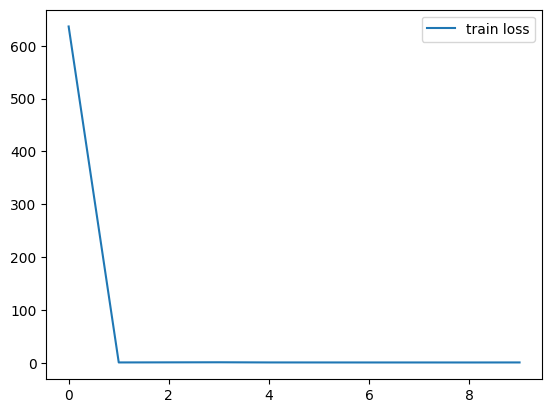

In [10]:
# train loss
plt.plot(history.history['loss'], label='train loss')
plt.legend()
plt.show()

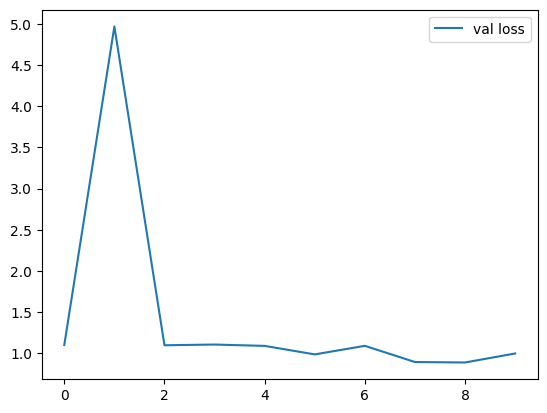

In [11]:
# validation loss
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

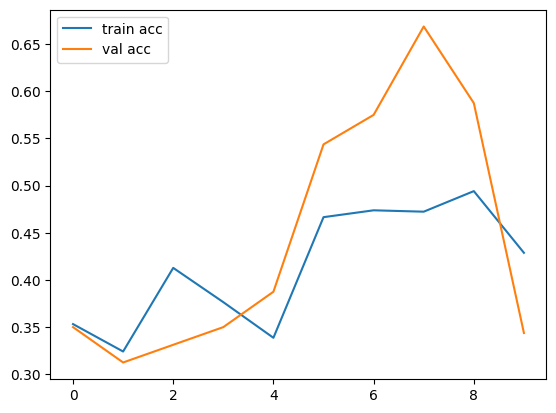

In [12]:
# accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

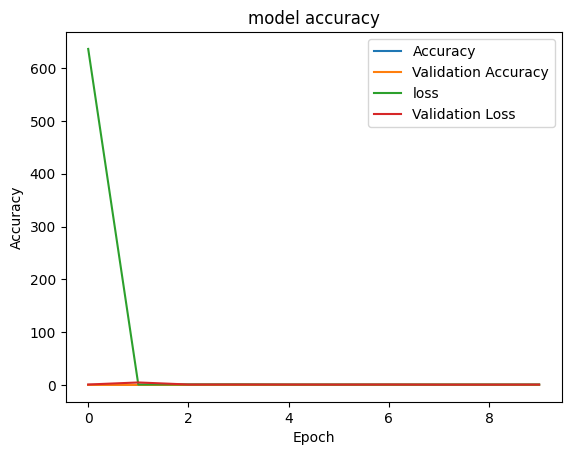

In [13]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [14]:
# Testing
gen = ImageDataGenerator(
    rescale=1.0/255.0,
    samplewise_center=True,
    samplewise_std_normalization=True
)

data_path = "Data-Testing/"

test_ds=gen.flow_from_directory(
    data_path,
    class_mode='categorical',
    shuffle=True,
    batch_size=32,
    target_size=(244,244)
)

Found 903 images belonging to 3 classes.


In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


11/29 [==========>...................] - ETA: 1:31 - loss: 1.6847 - accuracy: 0.3153

In [ ]:
"""
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from PIL import Image

data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2)
)

original_images_dir = "Data-Testing/bikes"
augmented_images_dir = "Data-Testing/new-bikes"

os.makedirs(augmented_images_dir, exist_ok=True)

for filename in os.listdir(original_images_dir):
    img_path = os.path.join(original_images_dir, filename)
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array.reshape((1,) + img_array.shape)
    i = 0
    for batch in data_generator.flow(img_array, batch_size=1, save_to_dir=augmented_images_dir,
                                     save_prefix='augmented', save_format='jpg'):
        i += 1
        if i >= 15:
            break
"""
